In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Balancing Dataset
from imblearn.over_sampling import SMOTE


In [ ]:
# Replace this path with your actual dataset path in Drive
df = pd.read_csv("/content/drive/My Drive/BankChurners.csv")
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Check shape and data types
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Info:")
df.info()


Dataset Shape: (10127, 23)

Column Names:
 Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                          

In [ ]:
# Dropping irrelevant columns from this dataset
df = df.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], errors='ignore')

df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Convert target column to binary (1 = Attrited, 0 = Existing)
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

# Check if encoding worked
df['Attrition_Flag'].value_counts()


,count
Attrition_Flag,
0,8500
1,1627


In [ ]:
# Check if there are any missing values in the dataset
df.isnull().sum()


,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


/tmp/ipython-input-526172381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=df, palette='viridis')


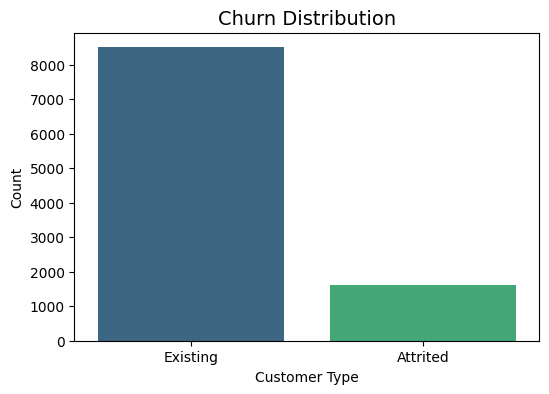

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition_Flag', data=df, palette='viridis')
plt.xticks([0,1], ['Existing', 'Attrited'])
plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()


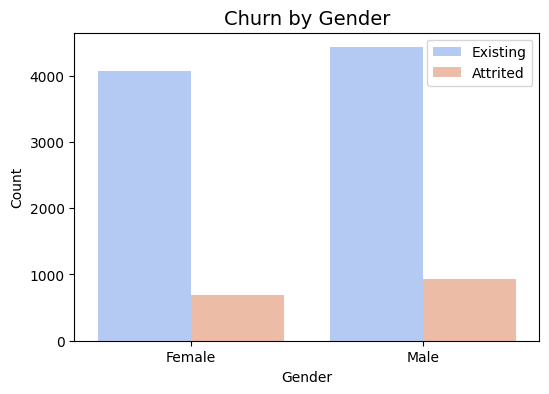

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Attrition_Flag', data=df, palette='coolwarm')
plt.xticks([0,1], ['Female', 'Male'])
plt.title("Churn by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(['Existing', 'Attrited'])
plt.show()


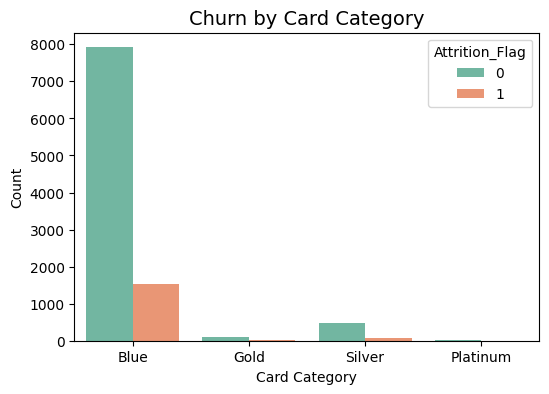

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df, palette='Set2')
plt.title("Churn by Card Category", fontsize=14)
plt.xlabel("Card Category")
plt.ylabel("Count")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
label_enc = LabelEncoder()

# Encode all object-type columns
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


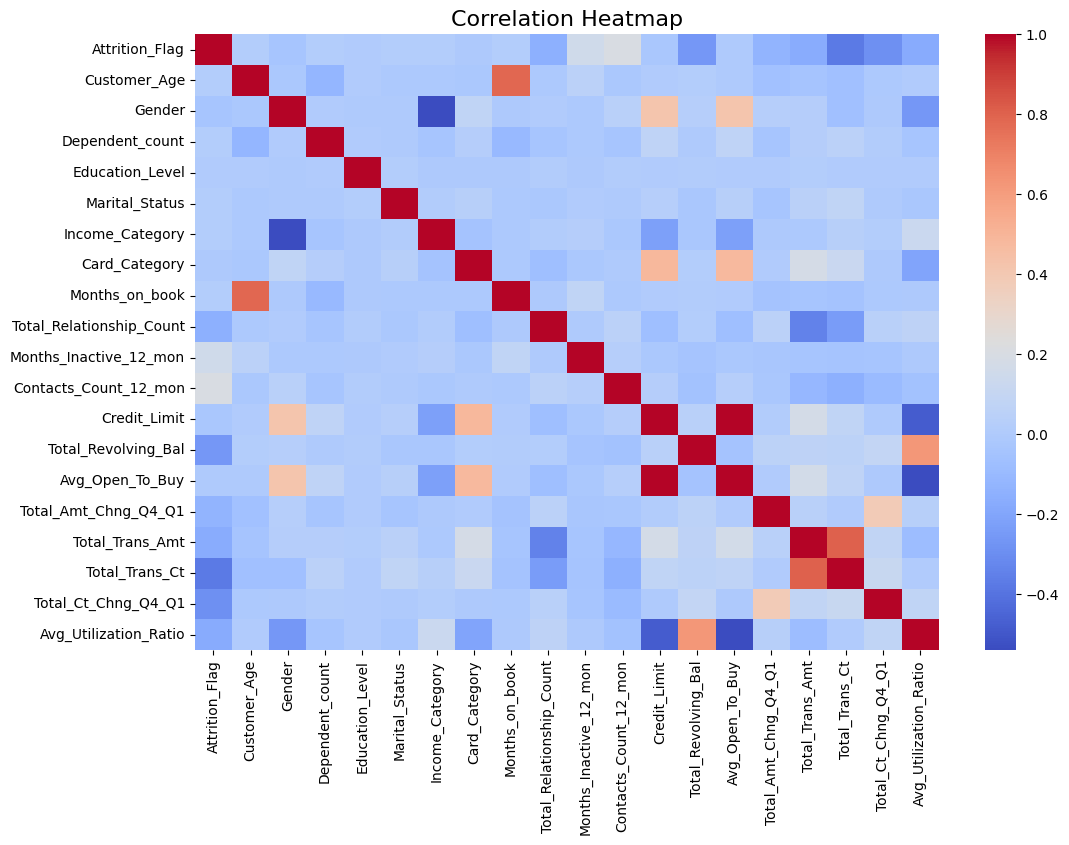

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [ ]:
df['Attrition_Flag'].value_counts(normalize=True)


,proportion
Attrition_Flag,
0,0.83934
1,0.16066


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class balance
pd.Series(y_resampled).value_counts()


,count
Attrition_Flag,
0,8500
1,8500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (13600, 19)
Test shape: (3400, 19)


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9776470588235294

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1676
           1       0.97      0.98      0.98      1724

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



In [ ]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

y_pred_et = et_model.predict(X_test)

print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred_et))
print("\nClassification Report (Extra Trees):\n", classification_report(y_test, y_pred_et))


Extra Trees Accuracy: 0.9714705882352941

Classification Report (Extra Trees):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1676
           1       0.97      0.97      0.97      1724

    accuracy                           0.97      3400
   macro avg       0.97      0.97      0.97      3400
weighted avg       0.97      0.97      0.97      3400



In [ ]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Extra Trees'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_et)
    ]
})

print(results)


           Model  Accuracy
0  Random Forest  0.977647
1    Extra Trees  0.971471


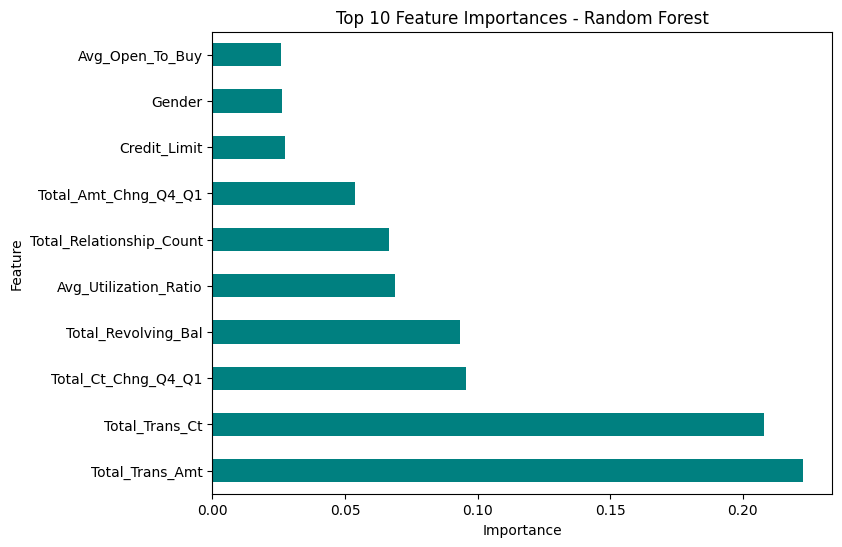

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6), color='teal')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


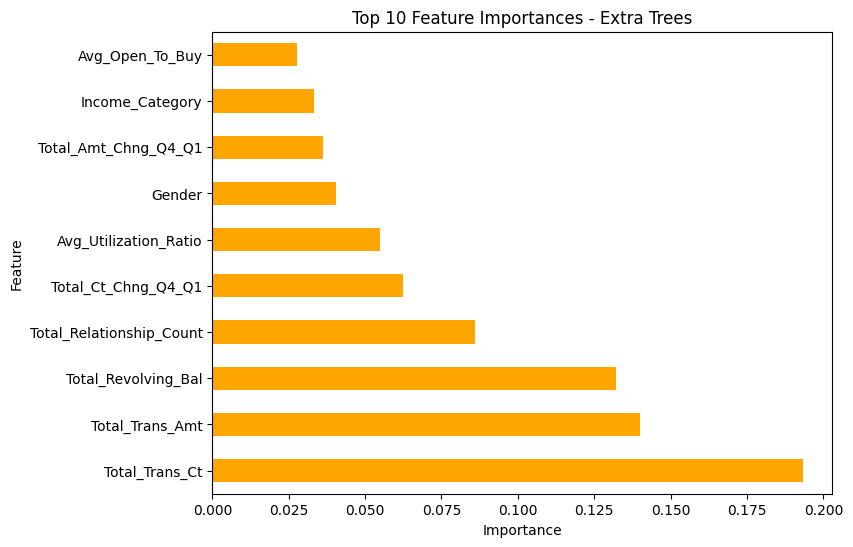

In [ ]:
feat_importances_et = pd.Series(et_model.feature_importances_, index=X_train.columns)
feat_importances_et.nlargest(10).plot(kind='barh', figsize=(8,6), color='orange')
plt.title("Top 10 Feature Importances - Extra Trees")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
import joblib

# Save the trained Random Forest model to Google Drive
joblib.dump(rf_model, '/content/drive/My Drive/churn_rf_model.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
# Load the model back (proof that saving worked)
loaded_model = joblib.load('/content/drive/My Drive/churn_rf_model.pkl')
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
# Check the feature names and count
print("Feature names expected by model:")
print(list(X_train.columns))
print("\nNumber of features:", len(X_train.columns))


Feature names expected by model:
['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Number of features: 19


In [ ]:
# Replace these numbers with realistic values based on your dataset's range
# Make sure the number of values matches len(X_train.columns) and order matches feature names

sample_customer = np.array([[45, 3, 4, 2, 3, 1, 12000, 36, 5000, 2, 1, 1, 3, 1, 2, 1, 0, 4, 2]])

# Convert to DataFrame with correct feature names
sample_df = pd.DataFrame(sample_customer, columns=X_train.columns)

# Predict churn
prediction = loaded_model.predict(sample_df)[0]
print("🧠 Prediction:", "Attrited Customer" if prediction == 1 else "Existing Customer")


🧠 Prediction: Existing Customer


In [ ]:
# Example: Multiple customers' data (values must match feature count and order in X_train.columns)
sample_customers = np.array([
    [45, 3, 4, 2, 3, 1, 12000, 36, 5000, 2, 1, 1, 3, 1, 2, 1, 0, 4, 2],  # Likely to stay
    [50, 2, 3, 4, 1, 0, 8000, 12, 2000, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0]     # Likely to leave
])

# Convert to DataFrame with correct column names
sample_df_multi = pd.DataFrame(sample_customers, columns=X_train.columns)

# Predictions
predictions = loaded_model.predict(sample_df_multi)

# Add prediction labels
sample_df_multi['Prediction'] = ["Attrited Customer" if p == 1 else "Existing Customer" for p in predictions]

# Show results
sample_df_multi


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Prediction
0,45,3,4,2,3,1,12000,36,5000,2,1,1,3,1,2,1,0,4,2,Existing Customer
1,50,2,3,4,1,0,8000,12,2000,1,0,0,2,0,1,0,1,2,0,Existing Customer


In [ ]:
print("📊 Final Model Accuracy on Test Data:", round(accuracy_score(y_test, y_pred_rf), 4))

print("\n💡 Key Insights from the Analysis:")
print("1️⃣ Transaction Amount (`Total_Trans_Amt`) and Transaction Count (`Total_Trans_Ct`) are the strongest predictors of churn.")
print("2️⃣ Customers with fewer transactions or lower transaction amounts are more likely to churn.")
print("3️⃣ High inactivity in the last 12 months significantly increases churn risk.")
print("4️⃣ Using SMOTE balancing improved churn detection for minority cases.")
print("5️⃣ The model achieved high accuracy while maintaining interpretability — making it suitable for business decision-making.")


📊 Final Model Accuracy on Test Data: 0.9776

💡 Key Insights from the Analysis:
1️⃣ Transaction Amount (`Total_Trans_Amt`) and Transaction Count (`Total_Trans_Ct`) are the strongest predictors of churn.
2️⃣ Customers with fewer transactions or lower transaction amounts are more likely to churn.
3️⃣ High inactivity in the last 12 months significantly increases churn risk.
4️⃣ Using SMOTE balancing improved churn detection for minority cases.
5️⃣ The model achieved high accuracy while maintaining interpretability — making it suitable for business decision-making.
